Data shape: (237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590
Mean of X: 3633.9915611814345
Mean of Y: 1282.873417721519
Total points: 237

Regression Coefficients:
Slope (b1): 0.2634293394893993
Intercept (b0): 325.5734210494428


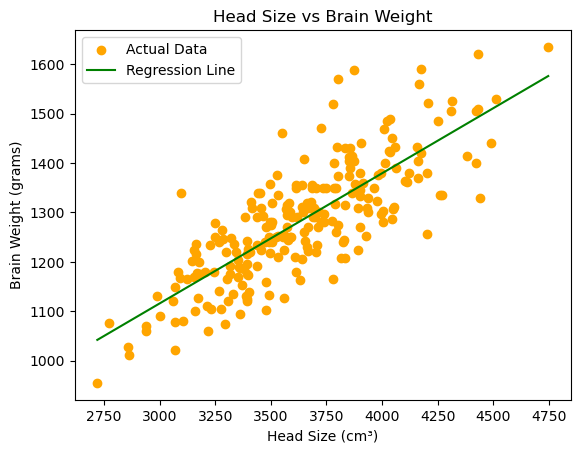


Model Accuracy (R² Score): 0.639311719957


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# STEP 1: Load the dataset
# ------------------------------------------------------------
data = pd.read_csv('headbrain.csv')   # CSV must contain 'Head Size(cm^3)' and 'Brain Weight(grams)'
print("Data shape:", data.shape)
print(data.head())

# ------------------------------------------------------------
# STEP 2: Extract the columns we need
# ------------------------------------------------------------
X = data['Head Size(cm^3)'].values    # Independent variable
Y = data['Brain Weight(grams)'].values  # Dependent variable

# ------------------------------------------------------------
# STEP 3: Calculate the means of X and Y
# ------------------------------------------------------------
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)

print("Mean of X:", mean_x)
print("Mean of Y:", mean_y)
print("Total points:", n)

# ------------------------------------------------------------
# STEP 4: Calculate slope (b1) and intercept (b0)
# Formula:
#   b1 = Σ((Xi - X̄)(Yi - Ȳ)) / Σ((Xi - X̄)²)
#   b0 = Ȳ - b1 * X̄
# ------------------------------------------------------------
numerator = np.sum((X - mean_x) * (Y - mean_y))
denominator = np.sum((X - mean_x) ** 2)

b1 = numerator / denominator
b0 = mean_y - (b1 * mean_x)

print("\nRegression Coefficients:")
print("Slope (b1):", b1)
print("Intercept (b0):", b0)

# ------------------------------------------------------------
# STEP 5: Plot regression line and data points
# ------------------------------------------------------------
# Generate points for regression line
x_line = np.linspace(X.min(), X.max(), 100)
y_line = b0 + b1 * x_line

# Plot scatter + line
plt.scatter(X, Y, color='orange', label='Actual Data')
plt.plot(x_line, y_line, color='green', label='Regression Line')

plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.title('Head Size vs Brain Weight')
plt.legend()
plt.show()

# ------------------------------------------------------------
# STEP 6: Evaluate model with R² score
# R² = 1 - (SS_res / SS_tot)
# ------------------------------------------------------------
y_pred = b0 + b1 * X
ss_res = np.sum((Y - y_pred) ** 2)
ss_tot = np.sum((Y - mean_y) ** 2)
r2 = 1 - (ss_res / ss_tot)

print("\nModel Accuracy (R² Score):", r2)
